In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
#from IPython.display import Audio
#sound_file = './sound/beep-01a.wav'
%matplotlib notebook

In [2]:
# Commodities
commodities_metadata = pd.read_csv('Commodities_metadata.csv')
commodities_data = pd.read_csv('Commodities_data.csv')

In [3]:
print(commodities_metadata.Ticker.values)
#print commodities_data.columns.values

['BUT1_Comdty' 'C_1_COMB_Comdty' 'CC1_COMB_Comdty' 'CL1_COMB_Comdty'
 'HG1_COMB_Comdty' 'JO1_Comdty' 'KC2_Comdty' 'LA1_Comdty' 'LH1_COMB_Comdty'
 'LN1_Comdty' 'O_1_COMB_Comdty' 'RR1_COMB_Comdty' 'S_1_COMB_Comdty'
 'SB1_Comdty' 'W_1_COMB_Comdty']


** Using insights from "process-commodities-data.ipynb", I interpolate the commodity values **

In [6]:
time_series_by_commodity = commodities_data.groupby(['Date', 'Ticker']).Open.mean().unstack()
# Drop butter, which is over 97% empty
time_series_by_commodity = time_series_by_commodity.drop(['BUT1_Comdty'], axis='columns')
# Linear interpolation for two seriously missing commodities
time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']] = time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']].interpolate()
# Cubic spline interpolation for other commodities
Y = time_series_by_commodity[['C_1_COMB_Comdty', 'CC1_COMB_Comdty', 'CL1_COMB_Comdty', 'HG1_COMB_Comdty', 'JO1_Comdty', 
                              'KC2_Comdty', 'LH1_COMB_Comdty', 'O_1_COMB_Comdty', 'RR1_COMB_Comdty', 'S_1_COMB_Comdty', 
                              'SB1_Comdty', 'W_1_COMB_Comdty']]
x = np.arange(len(Y))
time_series_by_commodity[['C_1_COMB_Comdty', 'CC1_COMB_Comdty', 'CL1_COMB_Comdty', 'HG1_COMB_Comdty', 'JO1_Comdty', 
                              'KC2_Comdty', 'LH1_COMB_Comdty', 'O_1_COMB_Comdty', 'RR1_COMB_Comdty', 'S_1_COMB_Comdty', 
                              'SB1_Comdty', 'W_1_COMB_Comdty']] \
= Y.apply(lambda y: CubicSpline(x[y.notnull()], y[y.notnull()])(x))
# Standardize to take prices on the first day as 1
time_series_by_commodity = time_series_by_commodity / time_series_by_commodity.iloc[0]

<IPython.core.display.Javascript object>


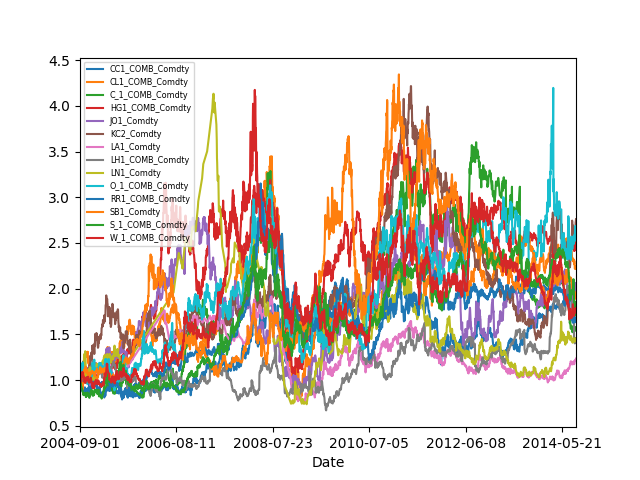

In [7]:
time_series_by_commodity.plot()
plt.legend(fontsize='xx-small', loc='upper left')
plt.show()

** In the next step, I turn the price time series into log returns form to analyze return correlations **

** First, I want to check if the returns are stationary, and if yes, I want to calculate their correlations **

In [15]:
commodities_std_prices = time_series_by_commodity
commodities_log_returns = np.log(commodities_std_prices).diff()
commodities_log_returns = commodities_log_returns[1:]

** Plot log returns **

<IPython.core.display.Javascript object>


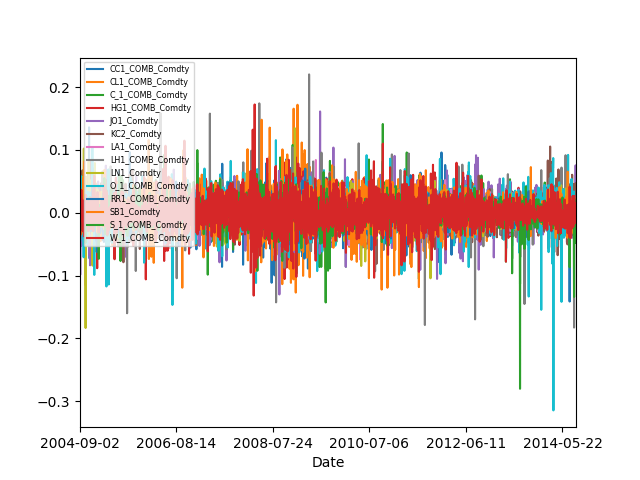

In [17]:
commodities_log_returns.plot()
plt.legend(fontsize='xx-small', loc='upper left')

We use correlation coefficient as an equivalent measure of the euclidean distance between the log returns time series. Inspired by article: https://arxiv.org/pdf/1601.02213.pdf

In [18]:
commodities_log_returns.corr()

Ticker,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LA1_Comdty,LH1_COMB_Comdty,LN1_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Ticker,,,,,,,,,,,,,,
CC1_COMB_Comdty,1.000000,0.162685,0.110979,0.169426,0.040968,0.184159,0.106513,0.039634,0.086071,0.069451,0.068932,0.154678,0.124425,0.123256
CL1_COMB_Comdty,0.162685,1.000000,0.269661,0.412840,0.105273,0.212471,0.213175,0.058404,0.169602,0.166661,0.147241,0.212807,0.318048,0.237607
C_1_COMB_Comdty,0.110979,0.269661,1.000000,0.224621,0.056237,0.189228,0.157199,0.031596,0.094695,0.426716,0.231704,0.196110,0.594691,0.596883
HG1_COMB_Comdty,0.169426,0.412840,0.224621,1.000000,0.092382,0.210552,0.299014,0.053488,0.209341,0.183458,0.173025,0.220462,0.288035,0.201461
JO1_Comdty,0.040968,0.105273,0.056237,0.092382,1.000000,0.056809,0.081031,0.009712,0.081973,0.039792,0.035310,0.056040,0.085643,0.050141
KC2_Comdty,0.184159,0.212471,0.189228,0.210552,0.056809,1.000000,0.146566,0.018271,0.131537,0.137612,0.115138,0.238370,0.184332,0.186379
LA1_Comdty,0.106513,0.213175,0.157199,0.299014,0.081031,0.146566,1.000000,0.041719,0.359612,0.112716,0.095421,0.128556,0.178540,0.133818
LH1_COMB_Comdty,0.039634,0.058404,0.031596,0.053488,0.009712,0.018271,0.041719,1.000000,0.008764,0.025077,0.020353,0.020153,0.095850,0.053165
LN1_Comdty,0.086071,0.169602,0.094695,0.209341,0.081973,0.131537,0.359612,0.008764,1.000000,0.096267,0.061715,0.102721,0.139645,0.079955


Euclidean metric $\sqrt{2(1-r)}$ turns linear coefficient into viable distance metric

In [21]:
euclidean_metric = np.sqrt(2 * (1-commodities_log_returns.corr()))

In [22]:
euclidean_metric

Ticker,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LA1_Comdty,LH1_COMB_Comdty,LN1_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Ticker,,,,,,,,,,,,,,
CC1_COMB_Comdty,0.000000,1.294075,1.333432,1.288855,1.384942,1.277373,1.336777,1.385905,1.351983,1.364221,1.364601,1.300248,1.323310,1.324194
CL1_COMB_Comdty,1.294075,0.000000,1.208585,1.083661,1.337704,1.255013,1.254452,1.372294,1.288719,1.290999,1.305955,1.254746,1.167863,1.234823
C_1_COMB_Comdty,1.333432,1.208585,0.000000,1.245295,1.373872,1.273399,1.298308,1.391693,1.345589,1.070779,1.239593,1.267983,0.900343,0.897906
HG1_COMB_Comdty,1.288855,1.083661,1.245295,0.000000,1.347307,1.256541,1.184049,1.375872,1.257504,1.277922,1.286059,1.248629,1.193286,1.263756
JO1_Comdty,1.384942,1.337704,1.373872,1.347307,0.000000,1.373456,1.355705,1.407329,1.355011,1.385791,1.389021,1.374016,1.352299,1.378303
KC2_Comdty,1.277373,1.255013,1.273399,1.256541,1.373456,0.000000,1.306472,1.401234,1.317925,1.313307,1.330310,1.234204,1.277238,1.275634
LA1_Comdty,1.336777,1.254452,1.298308,1.184049,1.355705,1.306472,0.000000,1.384400,1.131714,1.332129,1.345049,1.320185,1.281765,1.316193
LH1_COMB_Comdty,1.385905,1.372294,1.391693,1.375872,1.407329,1.401234,1.384400,0.000000,1.408003,1.396369,1.399748,1.399891,1.344731,1.376107
LN1_Comdty,1.351983,1.288719,1.345589,1.257504,1.355011,1.317925,1.131714,1.408003,0.000000,1.344420,1.369880,1.339611,1.311758,1.356499


Perform hierarchical clustering using Scipy. Tutorial Reference: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [100]:
commodities_metadata

,Ticker,Commodity,SECURITY_NAME,CRNCY,QUOTE_UNITS
0,BUT1_Comdty,Butter,Generic 1st 'BUT' Future,EUR,EUR/MT
1,C_1_COMB_Comdty,Corn,Generic 1st 'C ' Future,USD,USd/bu.
2,CC1_COMB_Comdty,Cocoa,Generic 1st 'CC' Future,USD,USD/MT
3,CL1_COMB_Comdty,Oil,Generic 1st 'CL' Future,USD,USD/bbl.
4,HG1_COMB_Comdty,Copper,Generic 1st 'HG' Future,USD,USd/lb.
5,JO1_Comdty,Orange Juice,Generic 1st 'JO' Future,USD,USd/lb.
6,KC2_Comdty,Coffee,Generic 2nd 'KC' Future,USD,USd/lb.
7,LA1_Comdty,Aluminum,Generic 1st 'LA' Future,USD,USD/MT
8,LH1_COMB_Comdty,Lean Pork,Generic 1st 'LH' Future,USD,USd/lb.
9,LN1_Comdty,Nickel,Generic 1st 'LN' Future,USD,USD/MT


<IPython.core.display.Javascript object>


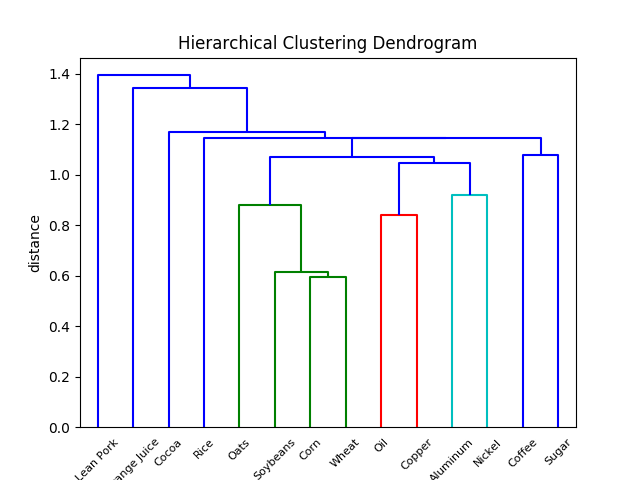

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(commodities_log_returns.corr(), 'single')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

def lookup(arr, df, keycol, targetcol):
    new_arr = []
    for e in arr:
        new_arr.append(df[df[keycol] == e].iloc[0][targetcol])
    return new_arr

dendrogram(
    Z,
    leaf_rotation=45.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=lookup(commodities_log_returns.columns.values, commodities_metadata, 'Ticker', 'Commodity')
)
plt.show()

** Compare with the result of **
https://gupea.ub.gu.se/bitstream/2077/32986/1/gupea_2077_32986_1.pdf